In [1]:
import os,sys
#set the path to the Sandbox repository and gempy
sys.path.append('../../../../') #Sand*box


In [2]:
## Initialize Sensor and Projector

In [3]:
#save the paths to the calibration files 
from sandbox import _calibration_dir
_calibprojector = _calibration_dir + "my_projector_calibration.json"
_calibsensor = _calibration_dir + "my_sensor_calibration.json"

In [4]:
#Import Sensor
from sandbox.sensor import Sensor
sensor = Sensor(calibsensor=_calibsensor, name="dummy")

JSON configuration loaded for sensor.
DummySensor initialized.


In [5]:
# Import projector
from sandbox.projector import Projector
projector = Projector(calibprojector=_calibprojector, show_colorbar=True)


JSON configuration loaded for projector.
Launching server at http://localhost:40645
Projector initialized and server started.
Please position the browser window accordingly and enter fullscreen!


## Initialize marker detection

In [6]:
#Initialize the aruco detection
from sandbox.markers import MarkerDetection
aruco = MarkerDetection(sensor=sensor)

Using dummy arucos. Create your own aruco positions using .set_aruco_position() function
using dummy aruco module
Aruco module loaded
Aruco detection ready


## Initialize main thread for live update

In [7]:
from sandbox.main_thread import MainThread
main = MainThread(sensor=sensor, projector=projector, aruco=aruco)

In [8]:
# Start the thread 
main.run()

Thread started or resumed...


In [9]:
main.widget_plot_module()

Thread stopped.

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Show colormap', value=True)
                    [2] Select(name='Choose a colormap', options=['gist_earth', ...], value='gist_earth')
                    [3] Column
                        [0] Markdown(str)
                        [1] WidgetBox
                            [0] Checkbox(name='Show relief shading', value=True)
                            [1] FloatSlider(end=360.0, name='Azimuth', value=315, value_throttled=315)
                            [2] FloatSlider(end=90.0, name='Altitude', value=45, value_throttled=45)
                            [3] FloatInput(name='Vertical Exageration', step=0.01, value=0.25, value_throttled=0.25)
                [1] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Active contours', value=True)
                    [2] Checkbox(name='Automatic levels f...)
                    [3] Markdown(str)
                    [4] WidgetBox
                        [0] Checkbox(name='Show major contours', value=True)
                        [1] IntInput(name='Choose a contour step', value=100, value_throttled=100)
                        [2] Checkbox(name='Show minor contours', value=True)
                        [3] IntInput(name='Choose a minor c..., value=50, value_throttled=50)
                        [4] Checkbox(name='Show contours label', value=True)
                        [5] IntInput(name='set a contour l..., value=15, value_throttled=15)
            [1] Column
                [0] Column
                    [0] Markdown(str)
                    [1] Checkbox(name='Aruco Detection', value=True)
                    [2] Column
                        [0] Markdown(str)
                        [1] Row
                            [0] WidgetBox
                                [0] Checkbox(name='Show aruco location', value=True)
                                [1] Checkbox(name='Show aruco id', value=True)
                                [2] Checkbox(name='Show line connecting a...)
                                [3] ColorPicker(name='Color', value='#ff0000')
                            [1] WidgetBox
                                [0] Markdown(str)
                                [1] Row
                                    [0] IntInput(name='id', value=1, value_throttled=1, width=70)
                                    [1] IntInput(name='x coordinate', value=50, value_throttled=50, width=70)
                                    [2] IntInput(name='y coordinate', value=50, value_throttled=50, width=70)
                                [2] Button(button_type='success', name='Add dummy aruco dict')
                                [3] Button(button_type='warning', name='Clear aruco dict')
                [1] Column
                    [0] Markdown(str)
                    [1] RadioButtonGroup(button_type='success', name='Thread controller', options=['Start', 'Stop'], value='Start')
                    [2] Checkbox(name='Check changes in fame')
                    [3] CrossSelector(definition_order=False, name='Module manager', options=['CmapModule', ...], value=['CmapModule', ...])
                    [4] Button(button_type='warning', name='Clear axes from p...)
                    [5] Markdown(str)
    [1] Tabs
        [0] Row
            [0] Column
                [0] Markdown(str)
                [1] Checkbox(name='Show colorbar', value=True)
                [2] TextInput(name='Label of colorbar')
                [3] Button(button_type='success', name='Refresh label')
            [1] Column
                [0] Select(name='Orientation Colorbar', options=['vertical', '...], value='vertical')
                [1] IntSlider(end=780, name='Top space', value_throttled=0)
                [2] IntSlider(end=1260, name='Left space', value_throttled=0)
                [3] IntSlider(end=1280, n

## Initialize the gempy module 

In [10]:
from sandbox.modules.gempy import GemPyModule
gpsb= GemPyModule(geo_model = None, 
                  extent = sensor.extent, 
                  box=sensor.physical_dimensions, 
                  load_examples = True,
                  name_example = ['Fault'])#, 'Horizontal_layers', 'Recumbent_fold', 'Anticline', 'Pinchout', 'Fault', 'Unconformity'], )

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


Active grids: ['regular']
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                     values
range               2289.1
$C_o$               124762
drift equations  [3, 3, 3]
Examples loaded in dictionary model_dict
Model Fault loaded as geo_model
scale in Model units/ mm (X,Y,Z): [1.0, 1.25, 5.625]
the shown extent is [0.0, 1000.0, 0.0, 1000.0] 
Active grids: ['regular' 'topography' 'sections']


## Add the module to the main thread

In [11]:
main.add_module(name='gempy', module=gpsb)

module gempy added to modules


In [ ]:
#Turn on Hill Shading
gpsb.show_hillshades = True

In [ ]:
gpsb.show_boundary = False
gpsb.show_lith = True
gpsb.show_hillshades = False
gpsb.show_contour = False
gpsb.show_fill_contour = False

Column
    [0] Markdown(str)
    [1] RadioButtonGroup(button_type='success', name='Model selector', options=['Fault'], value='Fault')
    [2] Matplotlib(Figure, height=500)
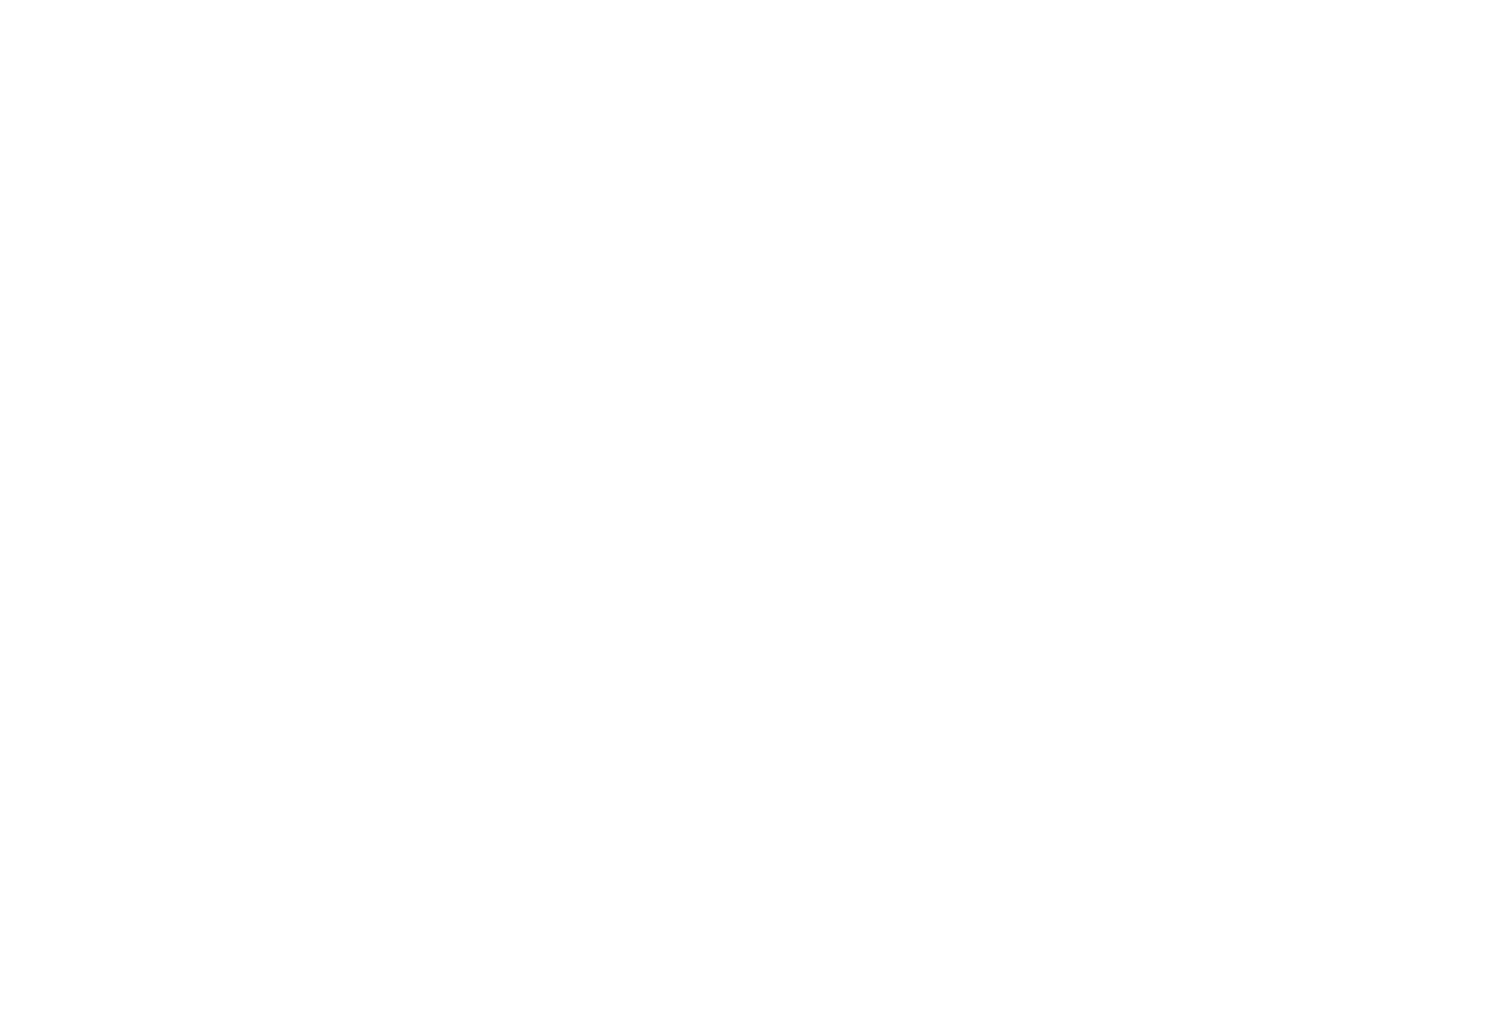

In [17]:
widget = gpsb.widget_model_selector()
widget

Active grids: ['regular' 'topography' 'sections']


Tabs
    [0] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(button_type='success', name='Model selector', options=['Fault'], value='Fault')
        [2] Matplotlib(Figure, height=500)
    [1] Column
        [0] Markdown(str)
        [1] Button(button_type='success', name='Update Geological map')
        [2] Matplotlib(Figure, height=500)
    [2] Column
        [0] Markdown(str)
        [1] Button(button_type='success', name='Update Section Traces')
        [2] Matplotlib(Figure, height=500)
    [3] Row
        [0] Column
            [0] Markdown(str)
            [1] Button(button_type='success', name='Update Cross Section')
            [2] Markdown(str)
            [3] WidgetBox
                [0] TextInput(name='Name cross section:', value='CS_1')
                [1] Row
                    [0] WidgetBox(horizontal=True)
                        [0] Markdown(str)
                        [1] TextInput(name='x:', value='10.0', width=60)
                        [2] TextInput(name='y:', value='20.0', width=60)
                    [1] WidgetBox(horizontal=True)
                        [0] Markdown(str)
                        [1] TextInput(name='x:', value='200.0', width=60)
                        [2] TextInput(name='y:', value='400.0', width=60)
            [4] Button(button_type='success', name='Add cross section')
            [5] Markdown(str)
            [6] AutocompleteInput(name='Cross section name', options=['Section1'])
            [7] Button(button_type='success', name='Remove cross section')
            [8] Markdown(str)
            [9] RadioBoxGroup(name='Available Cross s..., options=['Section1'], value='Section1')
        [1] Matplotlib(Figure, height=500)
    [4] Column
        [0] Markdown(str)
        [1] Button(button_type='success', name='Show Boreholes panel')
        [2] Button(button_type='warning', name='Show Boreholes pyvista')
        [3] Markdown(str)
        [4] WidgetBox
            [0] TextInput(name='Borehole name', value='BH_1')
            [1] Row
                [0] TextInput(name='x:', value='10.0', width=60)
                [1] TextInput(name='y:', value='20.0', width=60)
        [5] Button(button_type='success', name='Add borehole')
        [6] Markdown(str)
        [7] AutocompleteInput(name='Remove borehole name', options=['borehole1', ...])
        [8] Button(button_type='success', name='Remove borehole')
        [9] Markdown(str)
        [10] RadioBoxGroup(disabled=True, name='Available boreholes', options=['borehole1', ...], value='borehole1')
    [5] Column
        [0] Markdown(str)
        [1] Button(button_type='success', disabled=True, name='Show 3D Gempy Model')
        [2] Button(button_type='warning', name='Show 3D Gempy M...)
        [3] Markdown(str)
        [4] CheckBoxGroup(name='Select properties t..., options=['show_data', ...], value=['show_data', ...])
        [5] FloatInput(name='Vertical Exaggeration', value=0.3, value_throttled=0.3)
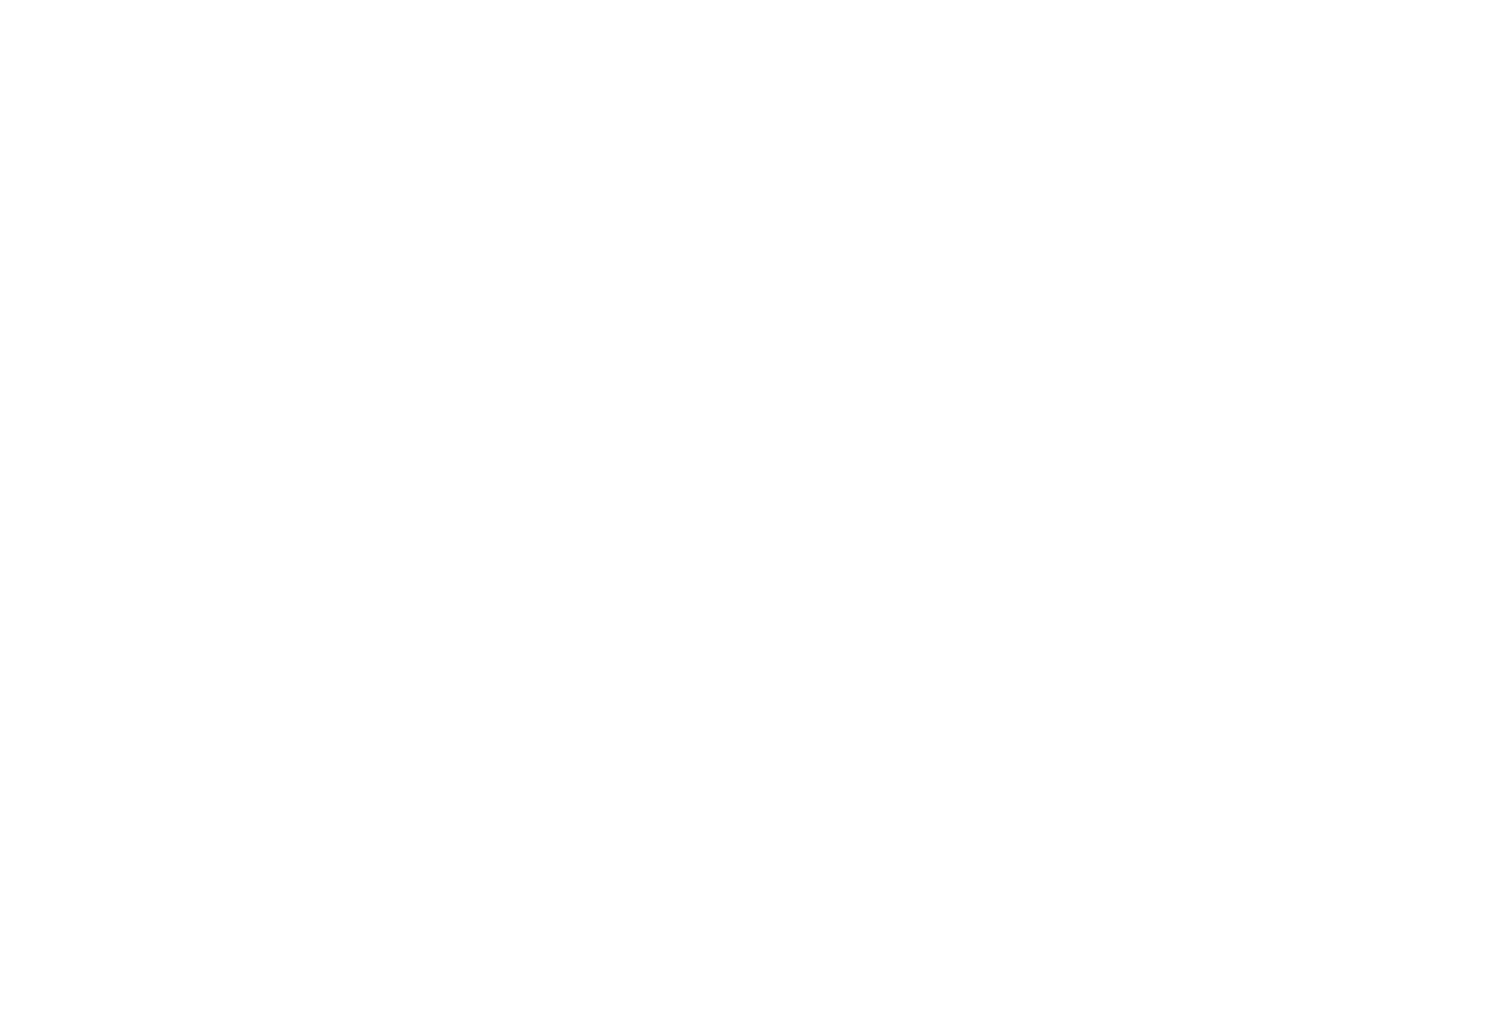
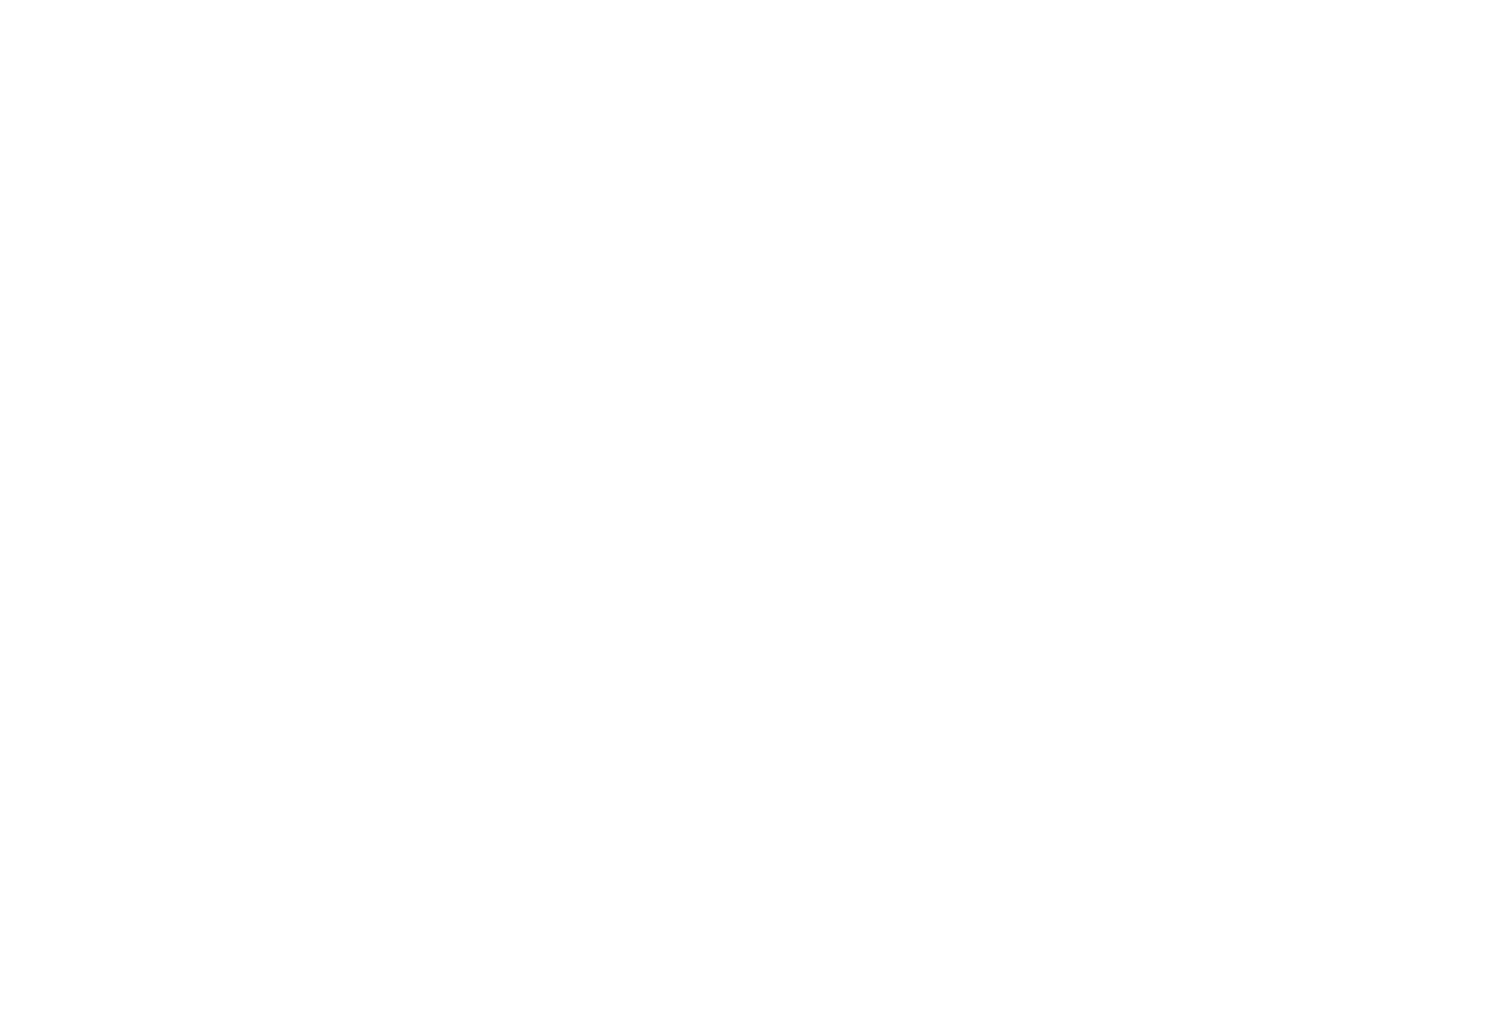
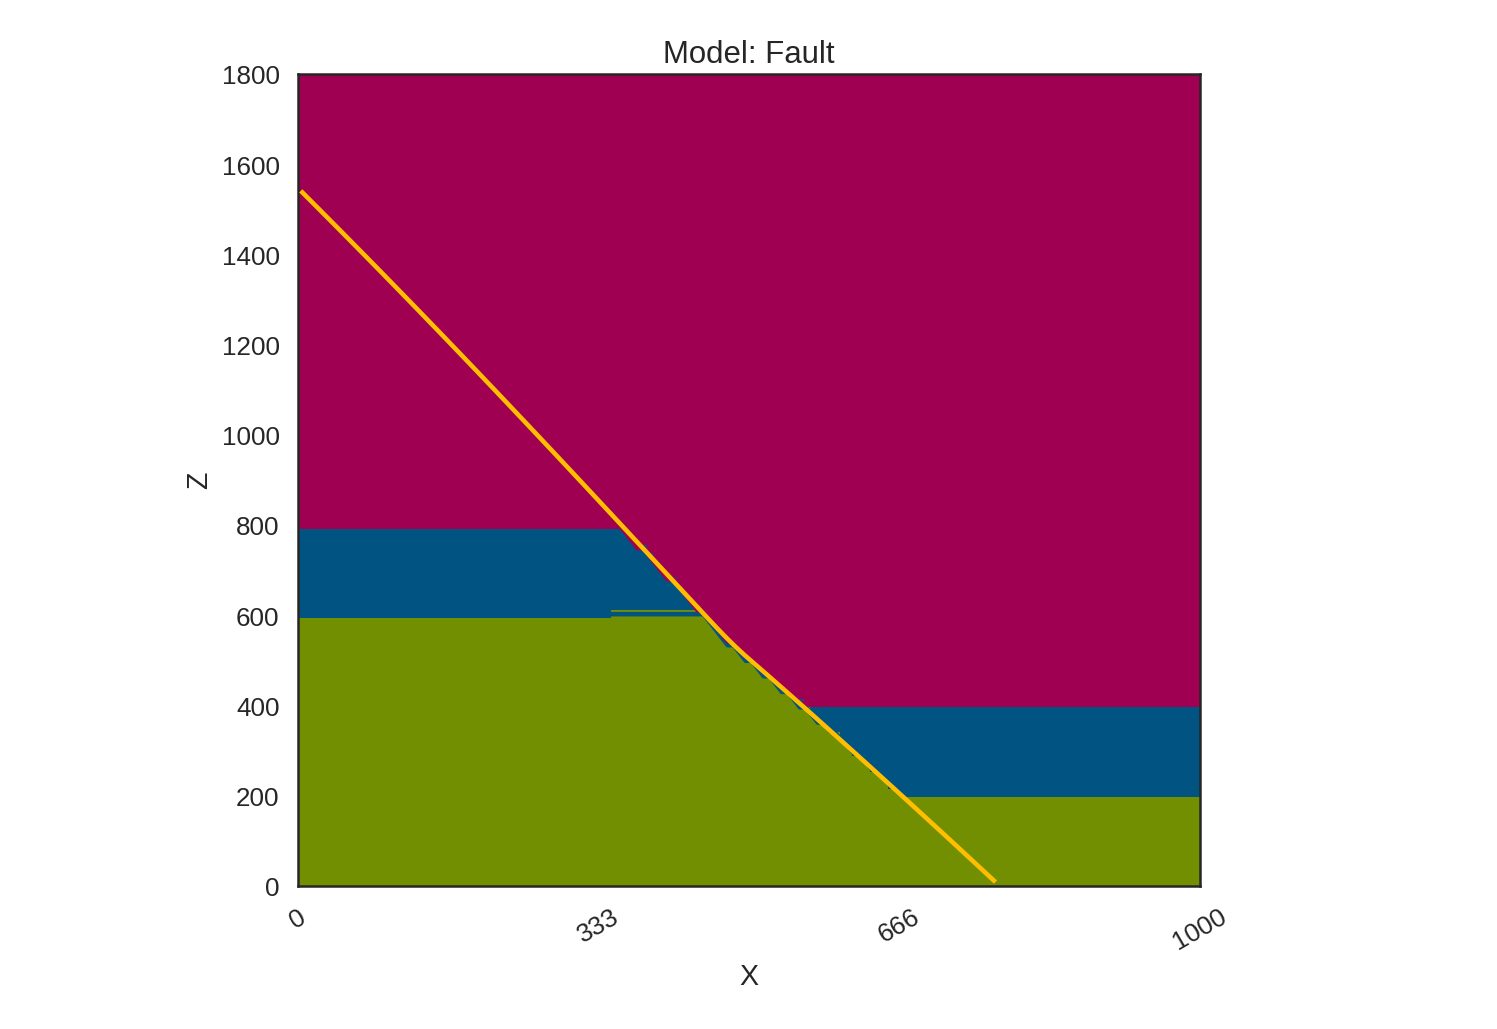
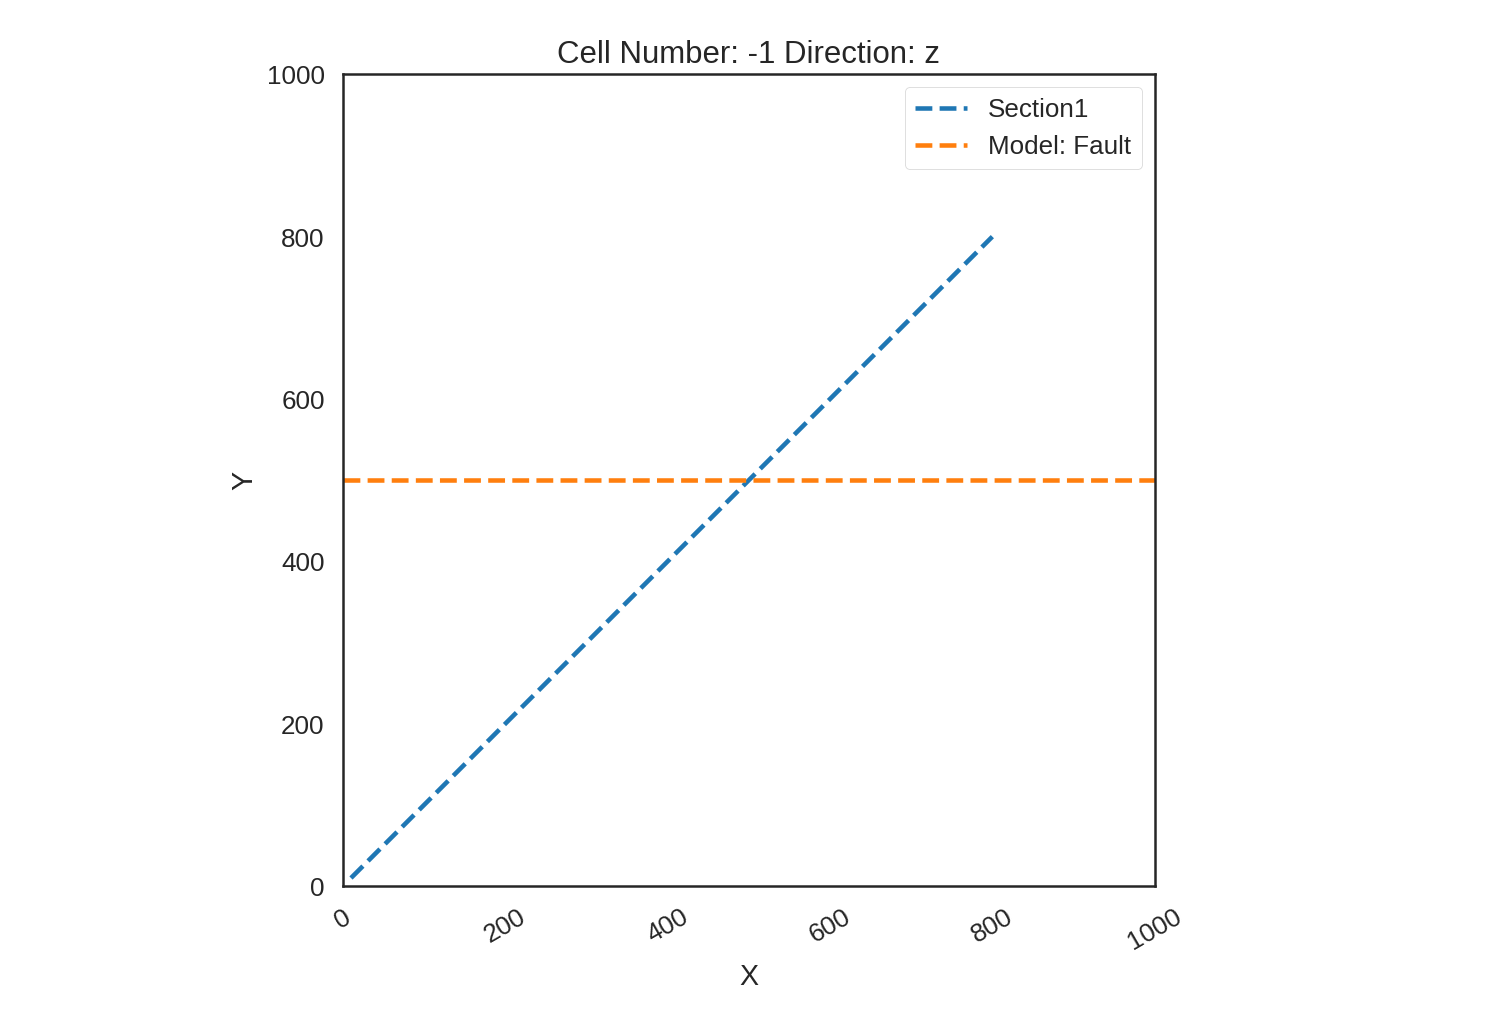

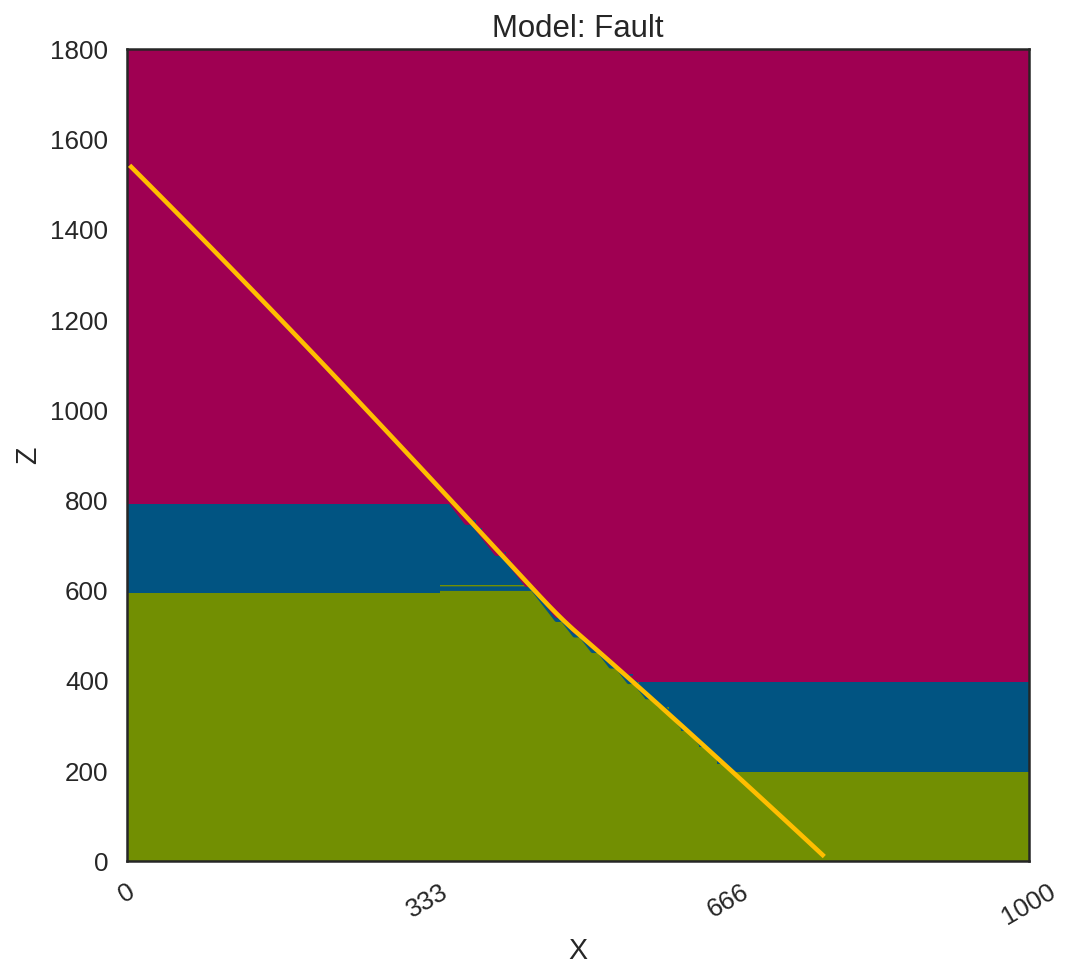

In [18]:
gpsb.show_widgets()


In [ ]:
#Stop Thread







main.stop()

### Set section dictionaries

In [12]:
gpsb.lock.acquire()
gpsb.set_section_dict((10,10), (800,800), "Section1") 
## add more
#
#
gpsb.lock.release()


Active grids: ['regular' 'topography' 'sections']


### show section traces 

In [13]:
gpsb.lock.acquire()
gpsb.show_section_traces() 
gpsb.lock.release()


### Cross Sections

In [14]:
# Possible cross sections to show
gpsb.model_sections_dict.keys()

dict_keys(['Section1', 'Model: Fault'])

In [15]:
#Carefull it kills the kernel
gpsb.lock.acquire()
gpsb.show_cross_section("Aruco_section")
gpsb.lock.release()

no key in section_dict have the name:  Aruco_section


### Boreholes

In [16]:
gpsb.lock.acquire()
gpsb.set_borehole_dict((10, 20), "borehole1")
gpsb.set_borehole_dict((200, 500), "borehole2")
gpsb.set_borehole_dict((500, 500), "borehole3")
gpsb.set_borehole_dict((900, 500), "borehole4")
gpsb.set_borehole_dict((100, 100), "borehole5")
gpsb.set_borehole_dict((600, 700), "borehole6")
gpsb.set_borehole_dict((200, 150), "borehole7")
gpsb.set_borehole_dict((150, 200), "borehole8")
gpsb._get_polygon_data()
if len(gpsb.borehole_tube) > 0:
    p = gpsb.plot_boreholes(notebook=False, background=False)
    p.show()
gpsb.lock.release()

Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']
Active grids: ['regular' 'topography' 'sections']


ValueError: Empty meshes cannot be plotted. Input mesh has zero points.

In [ ]:
gpsb.plot_3d_model()

In [ ]:
gpsb.borehole_dict

In [ ]:
if len(gpsb.borehole_dict) > 0:
    p = gpsb.plot_boreholes()
    p.show()

In [ ]:
gp.plot_3d(gpsb.geo_model, show_topography=False)

In [ ]:
_ = gpsb.geo_model.set_section_grid({'sect1': ([100., 50.], [800.,900.], [100., 150])})
_ = gp.compute_model(gpsb.geo_model, compute_mesh=False)
gp.plot_2d(gpsb.geo_model, section_names=['topography', 'sect1' ])

In [ ]:
{'sect1': [[100., 50.], [800.,900.], 100.]}

In [ ]:
gpsb.set_section_dict((100,100), (300,300), "1", )

In [ ]:
gpsb.section_dict